# Logistic and Delivery Customer Data Analysis

## Imports

In [72]:
# for data processing and manipulation
import pandas as pd
import numpy as np


# libraries for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## Load the dataset

In [73]:
# Load the dataset
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

# Print datatypes
print(df.dtypes)



Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object


In [74]:
# Preview the dataset
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


Data Description:
Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers.

X1 = my order was delivered on time.

X2 = contents of my order was as I expected.

X3 = I ordered everything I wanted to order.

X4 = I paid a good price for my order.

X5 = I am satisfied with my courier.

X6 = the app makes ordering easy for me.

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

In [75]:
# Describe columns
df.describe(include='all')

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [76]:
df[["X1","X2","X3","X4","X5","X6"]].describe()

,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


X1: 25% of the data are below 4, 50% are below 5, and 75% are below 5

X2: 25% of the data are below 2, 50% are below 3, and 75% are below 3

X3: 25% of the data are below 3, 50% are below 3, and 75% are below 4

X4: 25% of the data are below 3, 50% are below 4, and 75% are below 4

X5: 25% of the data are below 3, 50% are below 4, and 75% are below 4

x6: 25% of the data are below 4, 50% are below 4, and 75% are below 5

summary of X4 and X5 is simmilar

X4 = I paid a good price for my order, X5 = I am satisfied with my courier.

In [77]:
df.count()

Y     126
X1    126
X2    126
X3    126
X4    126
X5    126
X6    126
dtype: int64

In [78]:
df["Y"].value_counts()

1    69
0    57
Name: Y, dtype: int64

In [79]:
df["Y"].value_counts()[1]/126

0.5476190476190477

54.8% of the data are in category 1, while 45.2% are in category 0, thus the data is relatively balanced

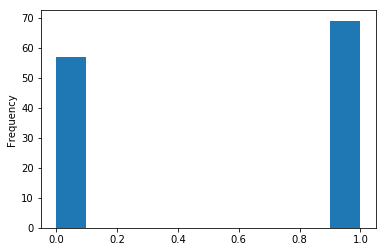

In [80]:

df["Y"].plot(kind = 'hist')

In [81]:
df["X1"].value_counts()

5    65
4    40
3    20
1     1
Name: X1, dtype: int64

X1 = my order was delivered on time; does not having score of 2, and has only one score of 1

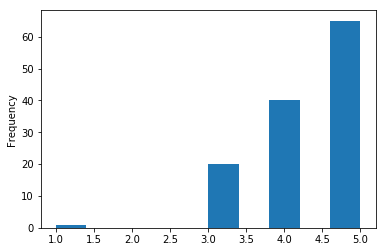

In [82]:
df["X1"].plot(kind = 'hist')

In [83]:
df["X2"].value_counts()

3    42
2    34
1    27
4    17
5     6
Name: X2, dtype: int64

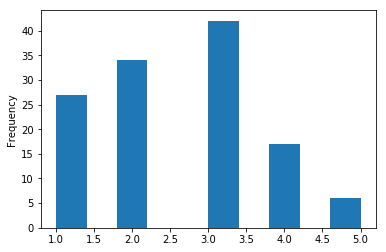

In [84]:
df["X2"].plot(kind = 'hist')

In [85]:
df["X3"].value_counts()

3    55
4    33
5    17
2    14
1     7
Name: X3, dtype: int64

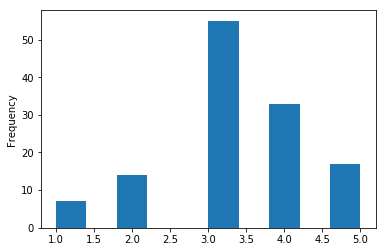

In [86]:
df["X3"].plot(kind = 'hist')

In [87]:
df["X4"].value_counts()

4    53
3    41
5    25
2     5
1     2
Name: X4, dtype: int64

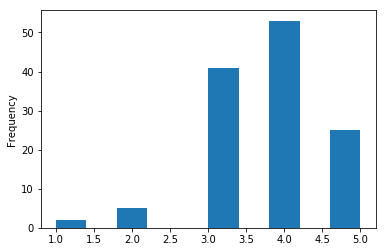

In [88]:
df["X4"].plot(kind = 'hist')

In [89]:
df["X5"].value_counts()

4    50
5    31
3    22
2    16
1     7
Name: X5, dtype: int64

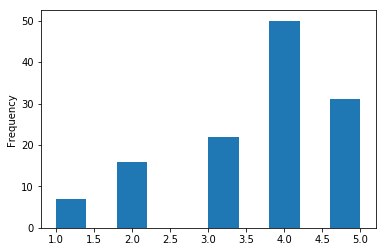

In [90]:
df["X5"].plot(kind = 'hist')

In [91]:
df["X6"].value_counts()

5    57
4    47
3    20
2     1
1     1
Name: X6, dtype: int64

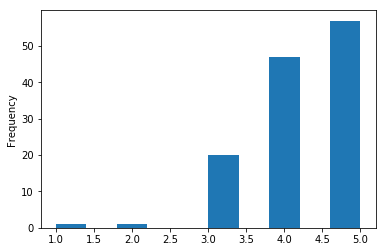

In [92]:
df["X6"].plot(kind = 'hist')

In [93]:
df.nunique()

Y     2
X1    4
X2    5
X3    5
X4    5
X5    5
X6    5
dtype: int64

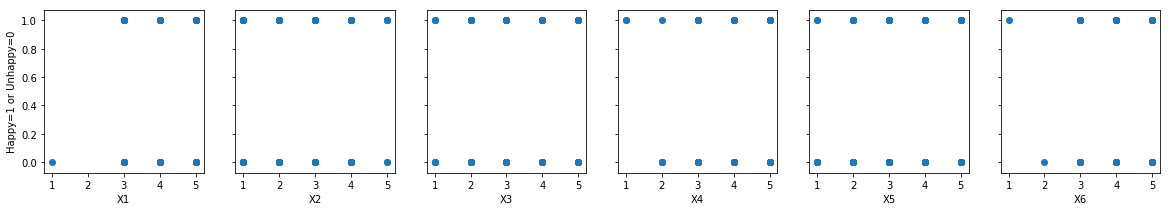

In [112]:
X_features = ['X1','X2','X3','X4','X5','X6']

# Target vs features
fig,ax=plt.subplots(1, 6, figsize=(20, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(df[X_features[i]],df['Y'])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Happy=1 or Unhappy=0")
plt.show()

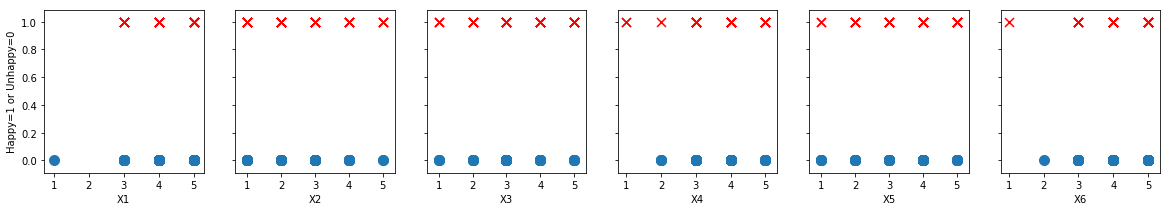

In [127]:
X_features = ['X1','X2','X3','X4','X5','X6']
pos = df['Y'].to_numpy() == 1
neg = df['Y'].to_numpy() == 0
# Target vs features
fig,ax=plt.subplots(1, 6, figsize=(20, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(df[X_features[i]].to_numpy()[pos], df['Y'].to_numpy()[pos], marker='x', s=80, c = 'red', label="y=1")
    ax[i].scatter(df[X_features[i]].to_numpy()[neg], df['Y'].to_numpy()[neg], marker='o', s=100, label="y=0")
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Happy=1 or Unhappy=0")
plt.show()

The above shows that there is no clear division for one individual feature for ratings 1-5 to show that a customer is happy or unhappy

# Checking for Correlation

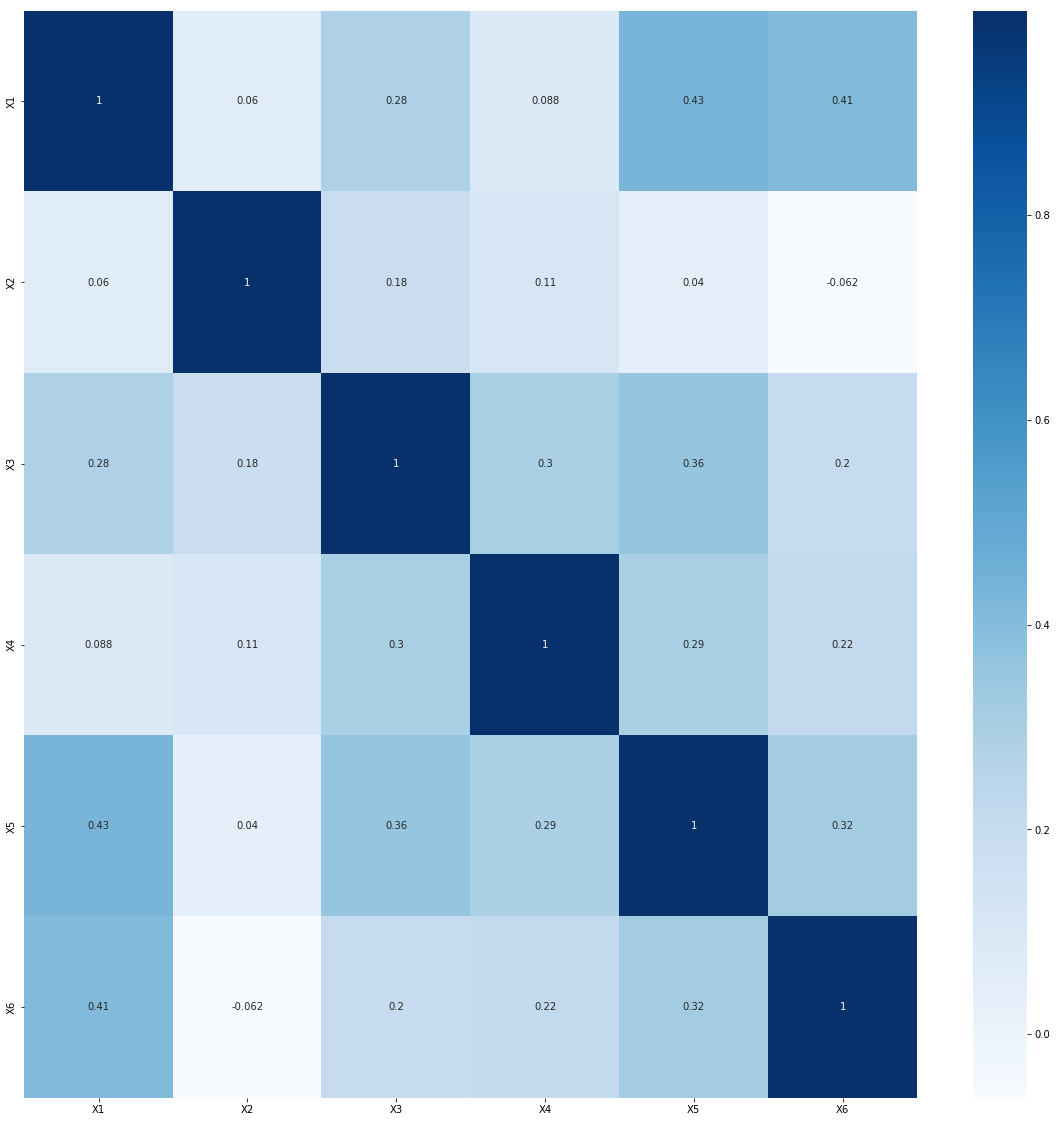

In [100]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate the correlation matrix for target relevant features that you previously determined
df_new = df.drop("Y", 1)
new_corr = df_new.corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

X5 is highly correlated with X4 and X3.
Retain X5 and remove X4 and X3

# Exploring new features

In [101]:

df['cross'] = df.X1 * df.X2 * df.X3 * df.X4
print(df.head(5))

   Y  X1  X2  X3  X4  X5  X6  cross
0  0   3   3   3   4   2   4    108
1  0   3   2   3   5   4   3     90
2  1   5   3   3   3   3   5    135
3  0   5   4   3   3   3   5    180
4  0   5   4   3   3   3   5    180


In [102]:
def onehot(Xarr):
    r = Xarr.shape[0]
    c = Xarr.shape[1]
    
    Hot = np.array(np.zeros([r,5*c]))

    for i in range(r):
        for j in range(c):
            if Xarr[i,j] == 1:
                Hot[i, 5*j: 5*j+5] = [1,0,0,0,0]
            elif Xarr[i,j] == 2:
                Hot[i, 5*j: 5*j+5] = [0,1,0,0,0]
            elif Xarr[i,j] == 3:
                Hot[i, 5*j: 5*j+5] = [0,0,1,0,0]
            elif Xarr[i,j] == 4:
                Hot[i, 5*j: 5*j+5] = [0,0,0,1,0]
            elif Xarr[i,j] == 5:
                Hot[i, 5*j: 5*j+5] = [0,0,0,0,1]

    return Hot


In [103]:
test=np.array([[1,2],[3,4], [1,1]])
L=onehot(test)
print(L)

[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [104]:
df_features = df[["X1","X2","X3","X4","X5","X6"]]
df_features = df_features.replace(1, "Low")
df_features = df_features.replace(2, "Low")
df_features = df_features.replace(3, "Medium")
df_features = df_features.replace(4, "High")
df_features = df_features.replace(5, "High")
print(df_features.head())

       X1      X2      X3      X4      X5      X6
0  Medium  Medium  Medium    High     Low    High
1  Medium     Low  Medium    High    High  Medium
2    High  Medium  Medium  Medium  Medium    High
3    High    High  Medium  Medium  Medium    High
4    High    High  Medium  Medium  Medium    High


In [105]:
dummy = pd.get_dummies(df_features)
print(dummy)

     X1_High  X1_Low  X1_Medium  X2_High  X2_Low  X2_Medium  X3_High  X3_Low  \
0          0       0          1        0       0          1        0       0   
1          0       0          1        0       1          0        0       0   
2          1       0          0        0       0          1        0       0   
3          1       0          0        1       0          0        0       0   
4          1       0          0        1       0          0        0       0   
..       ...     ...        ...      ...     ...        ...      ...     ...   
121        1       0          0        0       1          0        0       0   
122        1       0          0        0       1          0        0       0   
123        1       0          0        0       0          1        0       0   
124        1       0          0        0       0          1        0       0   
125        1       0          0        0       0          1        0       1   

     X3_Medium  X4_High  X4_Low  X4_Med